In [43]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

From functional programming to OOP  


In [44]:
class Model(nn.Module):
    def __init__(self, in_features = 4, h1 = 8, h2 = 4, out_features = 3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    



In [45]:
# Pick a manual seed for reproducibility
torch.manual_seed(41)
# Create an instance of the model
model = Model()
# Print the model architecture
print(model)
# Print the model summary
print("Model Summary:")
print("Input Layer: 4 features")
print("Hidden Layer 1: 8 neurons")
print("Hidden Layer 2: 4 neurons")
print("Output Layer: 3 classes (iris flower species)")

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
)
Model Summary:
Input Layer: 4 features
Hidden Layer 1: 8 neurons
Hidden Layer 2: 4 neurons
Output Layer: 3 classes (iris flower species)


In [46]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df['species']= my_df['species'].map({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})
X = my_df.drop('species', axis=1).values
y = my_df['species'].values
X.shape, y.shape

((150, 4), (150,))

In [47]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# In PyTorch, we need to convert the data into PyTorch tensors.
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
criterion = nn.CrossEntropyLoss() # Loss function for multi-class classification

In [48]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer with learning rate of 0.01

num_epochs = 1000 # Number of epochs for training
losses = [] # List to store the loss values for each epoch
test_losses = []
# Training loop
for epoch in range(num_epochs):
    step_loss = []
    model.train() # Set the model to training mode
    for i, data in enumerate(X_train):
        # backpropagation
        optimizer.zero_grad() # Zero the gradients 
        y_pred = model(data)
        loss = criterion(y_pred, y_train[i])
        loss.backward() # Compute the gradients
        optimizer.step() # Update the weights
        step_loss.append(loss)
        # print every 100 epochs
    loss = sum(step_loss) / len(step_loss) # Average loss for the epoch
    losses.append(loss.detach().numpy()) # Store the loss values

    with torch.no_grad(): # No need to compute gradients for the test set
        model.eval()
        step_test_loss = []
        for i, data in enumerate(X_test):
            y_test_pred = model(data) # Forward pass on the test set
            test_loss = criterion(y_test_pred, y_test[i]) # Compute the test loss
            step_test_loss.append(test_loss)
        test_loss = sum(step_test_loss) / len(step_test_loss)
        test_losses.append(test_loss.detach().numpy())

    # print every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss}, Test Loss: {test_loss}')
    

Epoch [100/1000], Loss: 0.07332494854927063, Test Loss: 0.03837988153100014
Epoch [200/1000], Loss: 0.07170283049345016, Test Loss: 0.04108130931854248
Epoch [300/1000], Loss: 0.07066372781991959, Test Loss: 0.04656220227479935
Epoch [400/1000], Loss: 0.06996344029903412, Test Loss: 0.05070348083972931
Epoch [500/1000], Loss: 0.06939557194709778, Test Loss: 0.05339319631457329
Epoch [600/1000], Loss: 0.0689346119761467, Test Loss: 0.05498713627457619
Epoch [700/1000], Loss: 0.06855039298534393, Test Loss: 0.05586548522114754
Epoch [800/1000], Loss: 0.06821487098932266, Test Loss: 0.05628542602062225
Epoch [900/1000], Loss: 0.06791003048419952, Test Loss: 0.05633560195565224
Epoch [1000/1000], Loss: 0.06762552261352539, Test Loss: 0.05615239590406418


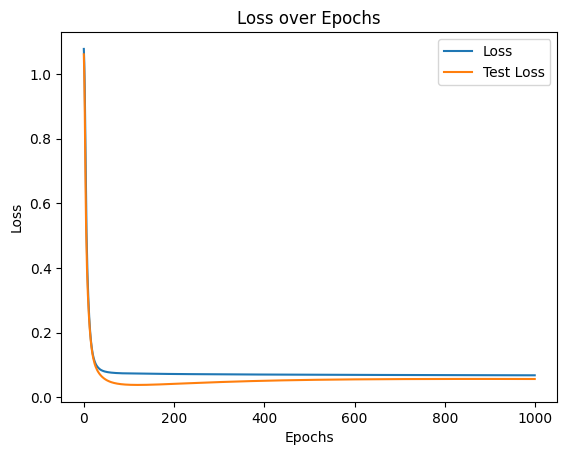

In [49]:
plt.plot(losses, label='Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [50]:
# Check if GPU is available and set the device
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")
print(torch.__version__)

False
0
No GPU found
2.7.0


In [51]:
class ModelX(nn.Module):
    ## input layer (4 dimensions) -> hidden layer 1 (128 dimensions) -> hidden layer 2 (64 dimensions) -> output layer (3 classes of iris flower species)
    ## The model is a simple feedforward neural network with two hidden layers.
    ## The first hidden layer has 128 neurons and the second hidden layer has 64 neurons.
    ## The activation function used is ReLU (Rectified Linear Unit).
    ## The output layer has 1 neuron, which is suitable for regression tasks.
    def __init__(self, in_features = 4, h1 = 8, h2 = 4, out_features = 3):
        super(ModelX, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        self._init_weights()
        # Initialize weights using Xavier uniform distribution

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(f"Using device: {device}")

# Pick a manual seed for reproducibility
torch.manual_seed# Create an instance of the model
modelX = ModelX().to(device)
optimizer = torch.optim.Adam(modelX.parameters(), lr=0.001)

Using device: cpu


In [53]:
# Move the data to the GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# To make full use of the GPU, we will need to do batch gradient descent
# will use DataLoader to create batches of data.

train_dataset = TensorDataset(X_train, y_train) # Create a TensorDataset from the training data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # Create a DataLoader for the training data
test_dataset = TensorDataset(X_test, y_test) # Create a TensorDataset from the test data
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False) # Create a DataLoader for the test data


# Training loop
num_epochs = 10000  # Number of epochs for training
losses = []  # List to store the loss values for each epoch
test_losses = []

for epoch in range(num_epochs):
    step_loss = []
    modelX.train()  # Set the model to training mode
    for data, target in train_loader:
        # Backpropagation
        optimizer.zero_grad()  # Zero the gradients
        y_pred = modelX(data)
        loss = criterion(y_pred, target)
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights
        step_loss.append(loss)

    # Average loss for the epoch
    loss = sum(step_loss) / len(step_loss)
    losses.append(loss.detach().cpu().numpy())  # Store the loss values (move to CPU for storage)

    # Evaluate on the test set
    with torch.no_grad():  # No need to compute gradients for the test set
        modelX.eval()
        step_test_loss = []
        for data, target in test_loader:
            y_test_pred = modelX(data)  # Forward pass on the test set
            test_loss = criterion(y_test_pred, target)  # Compute the test loss
            step_test_loss.append(test_loss)
        test_loss = sum(step_test_loss) / len(step_test_loss)
        test_losses.append(test_loss.detach().cpu().numpy())  # Move to CPU for storage

    # Print every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss}, Test Loss: {test_loss}")

Epoch [1000/10000], Loss: 0.06414619088172913, Test Loss: 0.04500359296798706
Epoch [2000/10000], Loss: 0.06405666470527649, Test Loss: 0.038356948643922806
Epoch [3000/10000], Loss: 0.0561559796333313, Test Loss: 0.03791442885994911
Epoch [4000/10000], Loss: 0.05896814167499542, Test Loss: 0.029790854081511497
Epoch [5000/10000], Loss: 0.04990658164024353, Test Loss: 0.03101501427590847
Epoch [6000/10000], Loss: 0.04648703336715698, Test Loss: 0.02836311236023903
Epoch [7000/10000], Loss: 0.04755284637212753, Test Loss: 0.0264732763171196
Epoch [8000/10000], Loss: 0.04679308459162712, Test Loss: 0.02428988553583622
Epoch [9000/10000], Loss: 0.04629647731781006, Test Loss: 0.023066896945238113
Epoch [10000/10000], Loss: 0.046771906316280365, Test Loss: 0.022128116339445114


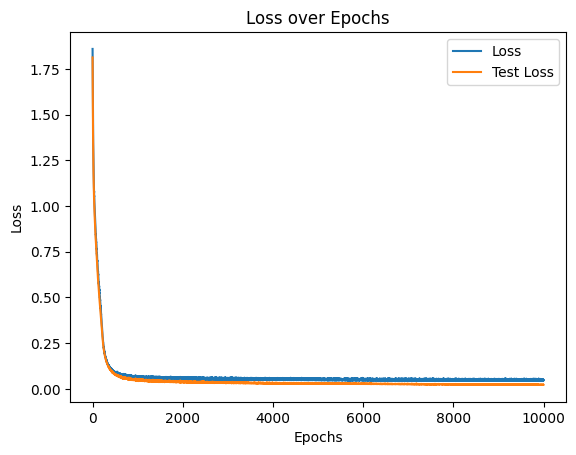

In [54]:
# Plotting the loss values
plt.plot(losses, label='Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()